In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.metrics import Recall, Precision
from sklearn.model_selection import train_test_split


In [5]:
filepath = '../raw_data/OASIS1/oasis1_concat.pkl'

In [6]:
rel_filepath = os.path.relpath(filepath)

In [7]:
oas1_file = open(rel_filepath, 'rb')

In [8]:
oas1_df = pickle.load(oas1_file)

In [ ]:
oas1_df.head()

In [ ]:
sag_sample = oas1_df[oas1_df.orient == 'sag'].image_arr[0]
cor_sample = oas1_df[oas1_df.orient == 'cor'].image_arr[1]
tra_sample = oas1_df[oas1_df.orient == 'tra'].image_arr[2]




In [ ]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 3, 1)
plt.imshow(sag_sample)
plt.subplot(1, 3, 2)
plt.imshow(cor_sample)
plt.subplot(1, 3, 3)
plt.imshow(tra_sample)
plt.show()

In [ ]:
sag_sample.shape, tra_sample.shape, cor_sample.shape


In [ ]:
np.rot90(sag_sample).shape

In [ ]:
concat_sample = np.concatenate((sag_sample, cor_sample, np.rot90(tra_sample)), axis = 1)

In [ ]:
plt.imshow(concat_sample)

In [ ]:
subject_id_list = oas1_df.Subject_ID.unique().tolist()

In [ ]:
oas1_df[oas1_df.Subject_ID == subject_id_list[1]][oas1_df.orient == 'sag'].image_arr.iloc[0]

In [ ]:
concat = []
for sub_id in subject_id_list:
    df = oas1_df[oas1_df.Subject_ID == sub_id]
    sag = df[df.orient == 'sag'].image_arr.iloc[0]
    cor = df[df.orient == 'cor'].image_arr.iloc[0]
    tra = df[df.orient == 'tra'].image_arr.iloc[0]
    
    concat_img = np.concatenate((sag, cor, np.rot90(tra)), axis = 1)
    concat.append(concat_img)

In [ ]:
plt.imshow(concat[234])

In [ ]:
concat_dict = {'Subject_ID' : [],
              'concat_img' : [],
              'CDR' : []}

for idx, sub_id in enumerate(subject_id_list):
    concat_dict['Subject_ID'].append(sub_id)
    concat_dict['concat_img'].append(concat[idx])
    cdr = oas1_df[oas1_df['Subject_ID'] == sub_id].CDR.iloc[0]
    concat_dict['CDR'].append(cdr)
    

In [ ]:
oas1_df[oas1_df['Subject_ID'] == '0457'].CDR.iloc[0]

In [ ]:
concat_df = pd.DataFrame.from_dict(concat_dict)

In [ ]:
pickle.dump(concat_df, open("oasis1_concat.pkl", "wb"))

In [ ]:
!rm oasis1_concat

In [ ]:
!ls

In [ ]:
concat_df.shape

In [ ]:
concat_df.concat_img[0].shape

In [10]:
oas1_df.head()

,Subject_ID,concat_img,CDR
0,0001,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0
1,0002,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0
2,0003,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",1
3,0010,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0
4,0011,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",0


In [12]:
oas1_df.concat_img.shape

(235,)

In [28]:
X.shape

(235, 176, 592, 1)

In [57]:
oas1_df.CDR.tolist()

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0]

In [63]:
X = Reshape(np.array([x for x in oas1_df.concat_img])

In [67]:
y = np.array(oas1_df.CDR.tolist())

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [69]:
X.shape, y.shape

((235, 176, 592, 1), (235,))

In [70]:
model = VGG16(
    include_top=False, weights=None, input_tensor=None,
    input_shape=X_train.shape[1:], pooling=None, classes=1000,
    classifier_activation='sigmoid')

In [73]:
model.add(Reshape((224, 224), input_shape=(176, 592)))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall', 'Precision'])

model.fit(X_train, y_train)

AttributeError: 'Functional' object has no attribute 'add'

In [80]:

import cv2

In [97]:
x0_cv2 = cv2.resize(X[0], dsize = (224, 224, 1))

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


In [99]:
x0_cv2.reshape(224, 224, 1).shape

(224, 224, 1)

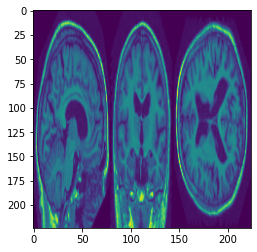

In [83]:
plt.imshow(x0_cv2)

In [85]:
oas1_sd_resize = oas1_df.copy()

In [ ]:
oas1_sd_resize

In [234]:
oas1_sd_resize.concat_img = oas1_df.concat_img.apply(lambda x : cv2.resize(x, dsize = (224, 224)))

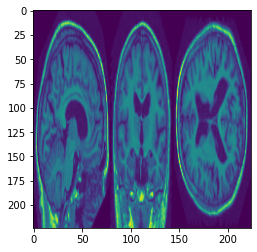

In [135]:
plt.imshow(oas1_sd_resize.concat_img[0])

In [262]:
X = np.array([x for x in oas1_sd_resize.concat_img]).reshape(235, 224, 224, 1)
# y = np.array(oas1_df.CDR.tolist())
y = np.array(oas1_df.CDR).reshape(235, 1)
            
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [263]:
X.shape

(235, 224, 224, 1)

In [264]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 224, 224, 1), (59, 224, 224, 1), (176, 1), (59, 1))

In [265]:
X_train.shape[1:]

(224, 224, 1)

In [266]:
base_model = VGG16(
    weights=None,
    include_top=False,
    input_shape=X.shape[1:]
)

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = True

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Recall', 'Precision']
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14713536  
                                                                 
 flatten_10 (Flatten)        (None, 25088)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25088)             0         
                                                                 
 dense_26 (Dense)            (None, 1)                 25089     
                                                                 
Total params: 14,738,625
Trainable params: 14,738,625
Non-trainable params: 0
_________________________________________________________________


In [268]:

model.fit(X_train, y_train, epochs= 20)

Epoch 1/20
6/6 [==============================] - 136s 22s/step - loss: 34.1841 - accuracy: 0.4886 - recall: 0.2911 - precision: 0.4035
Epoch 2/20
6/6 [==============================] - 137s 22s/step - loss: 0.6943 - accuracy: 0.5227 - recall: 0.1772 - precision: 0.4242
Epoch 3/20
6/6 [==============================] - 144s 24s/step - loss: 0.6987 - accuracy: 0.5511 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/20
6/6 [==============================] - 149s 24s/step - loss: 0.6912 - accuracy: 0.5511 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/20
6/6 [==============================] - 140s 23s/step - loss: 0.7016 - accuracy: 0.5511 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/20
6/6 [==============================] - 157s 26s/step - loss: 0.6891 - accuracy: 0.5511 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/20
6/6 [==============================] - 165s 27s/step - loss: 0.6902 - accuracy: 0.5511 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 8/20
3/6

KeyboardInterrupt: 

In [157]:
pd.DataFrame(y)

numpy.int64

In [ ]:
, 'Recall', 'Precision'

In [178]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

In [215]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=64,activation="relu"))
# model.add(Dense(units=16,activation="relu"))
# model.add(Dense(units=1, activation="sigmoid"))

In [216]:
# model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 conv2d_96 (Conv2D)          (None, 224, 224, 512)     295424    
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 512)    0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 112, 112, 128)     589952    
                                                                 
 conv2d_98 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [217]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall', 'Precision'])

In [219]:
model.fit(X_train, y_train, epochs= 10, validation_split=0.3)

Epoch 1/10
4/4 [==============================] - 339s 92s/step - loss: 0.8650 - accuracy: 0.4634 - recall: 0.3265 - precision: 0.3265 - val_loss: 0.6966 - val_accuracy: 0.4717 - val_recall: 0.2812 - val_precision: 0.6429
Epoch 2/10
4/4 [==============================] - 250s 64s/step - loss: 0.6827 - accuracy: 0.6179 - recall: 0.1633 - precision: 0.5714 - val_loss: 0.7898 - val_accuracy: 0.3962 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 255s 66s/step - loss: 0.6947 - accuracy: 0.6016 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6990 - val_accuracy: 0.4717 - val_recall: 0.2188 - val_precision: 0.7000
Epoch 4/10
4/4 [==============================] - 269s 71s/step - loss: 0.6662 - accuracy: 0.6016 - recall: 0.0816 - precision: 0.5000 - val_loss: 0.7411 - val_accuracy: 0.3962 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/10


KeyboardInterrupt: 

In [255]:
y_pred = np.round(model.predict(X_test),0)

In [204]:
from sklearn.metrics import accuracy_score

In [256]:
accuracy_score(y_test, y_pred)

0.4745762711864407